<a href="https://colab.research.google.com/github/Srijan2001/Air-Quality-Index-Prediction-/blob/main/AQI_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import csv
import time
import requests
import sys
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def retrieve_html():

  for year in range (2013,2019):

    for month in range(1,13):

      if(month<10):
        url="http://en.tutiempo.net/climate/0{}-{}/ws-421820.html".format(month,year)

      else:
        url = "http://en.tutiempo.net/climate/{}-{}/ws-421820.html".format(month, year)


      texts = requests.get(url)
      text_utf=texts.text.encode('utf-8')

      if not os.path.exists("/content/{}".format(year)):
        os.makedirs("/content/{}".format(year))

      with open("/content/{}/{}.html".format(year,month),"wb") as output:
        output.write(text_utf)

    sys.stdout.flush()


if __name__=="__main__":
  start_time=time.time()
  retrieve_html()
  stop_time=time.time()
  print("Time taken {}".format(stop_time-start_time))

Time taken 54.07345247268677


In [3]:
lst2013 = 0
lst2014 = 0
lst2015 = 0
lst2016 = 0

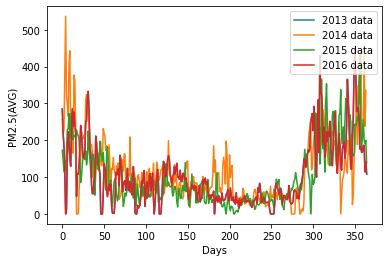

In [5]:
def avg_data_2013():
    temp_i=0
    average=[]
    for rows in pd.read_csv('/content/aqi2013.csv', chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var= add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average


def avg_data_2014():
    temp_i=0
    average=[]
    for rows in pd.read_csv('/content/aqi2014.csv' , chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var= add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average

  
def avg_data_2015():
    temp_i=0
    average=[]
    for rows in pd.read_csv('/content/aqi2015.csv' , chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var= add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average


def avg_data_2016():
    temp_i=0
    average=[]
    for rows in pd.read_csv('/content/aqi2016.csv' , chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var= add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average


if __name__=="__main__":
    lst2013=avg_data_2013()
    lst2014=avg_data_2014()
    lst2015=avg_data_2015()
    lst2016=avg_data_2016()
    
    plt.xlabel("Days")
    plt.ylabel("PM2.5(AVG)")
    plt.plot(range(0,365), lst2013, label="2013 data")
    plt.plot(range(0,364), lst2014, label="2014 data")
    plt.plot(range(0,365), lst2015, label="2015 data")
    plt.plot(range(0,365), lst2016, label="2016 data")
    plt.legend(loc='upper right')
    plt.show()

In [6]:
def met_data(month, year):
    
    file_html = open('/content/{}/{}.html'.format(year,month), 'rb')
    plain_text = file_html.read()

    tempD = []
    finalD = []

    soup = BeautifulSoup(plain_text, "lxml")
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)

    rows = len(tempD) / 15

    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)

    length = len(finalD)

    finalD.pop(length - 1)
    finalD.pop(0)

    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)

    return finalD

def data_combine(year, cs):
    for a in pd.read_csv('/content/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist


if __name__ == "__main__":
    if not os.path.exists("/content/Real-Data"):
        os.makedirs("/content/Real-Data")
    for year in range(2013, 2017):
        final_data = []
        with open('/content/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(
                ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        for month in range(1, 13):
            temp = met_data(month, year)
            final_data = final_data + temp
            
        pm = getattr(sys.modules[__name__], 'avg_data_{}'.format(year))()

        if len(pm) == 364:
            pm.insert(364, '-')

        for i in range(len(final_data)-1):
            # final[i].insert(0, i + 1)
            final_data[i].insert(8, pm[i])

        with open('/content/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                flag = 0
                for elem in row:
                    if elem == "" or elem == "-":
                        flag = 1
                if flag != 1:
                    wr.writerow(row)
                    
    data_2013 = data_combine(2013, 600)
    data_2014 = data_combine(2014, 600)
    data_2015 = data_combine(2015, 600)
    data_2016 = data_combine(2016, 600)
     
    total=data_2013+data_2014+data_2015+data_2016
    
    with open('/content/Real-Data/Real_Combine.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        wr.writerows(total)
        
        
df=pd.read_csv('/content/Real-Data/Real_Combine.csv')


In [7]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


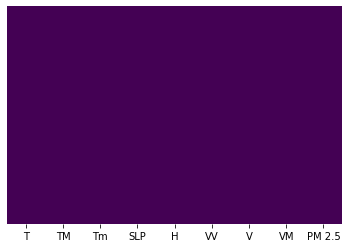

In [8]:
#Check for null values

sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df = df.dropna()

df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


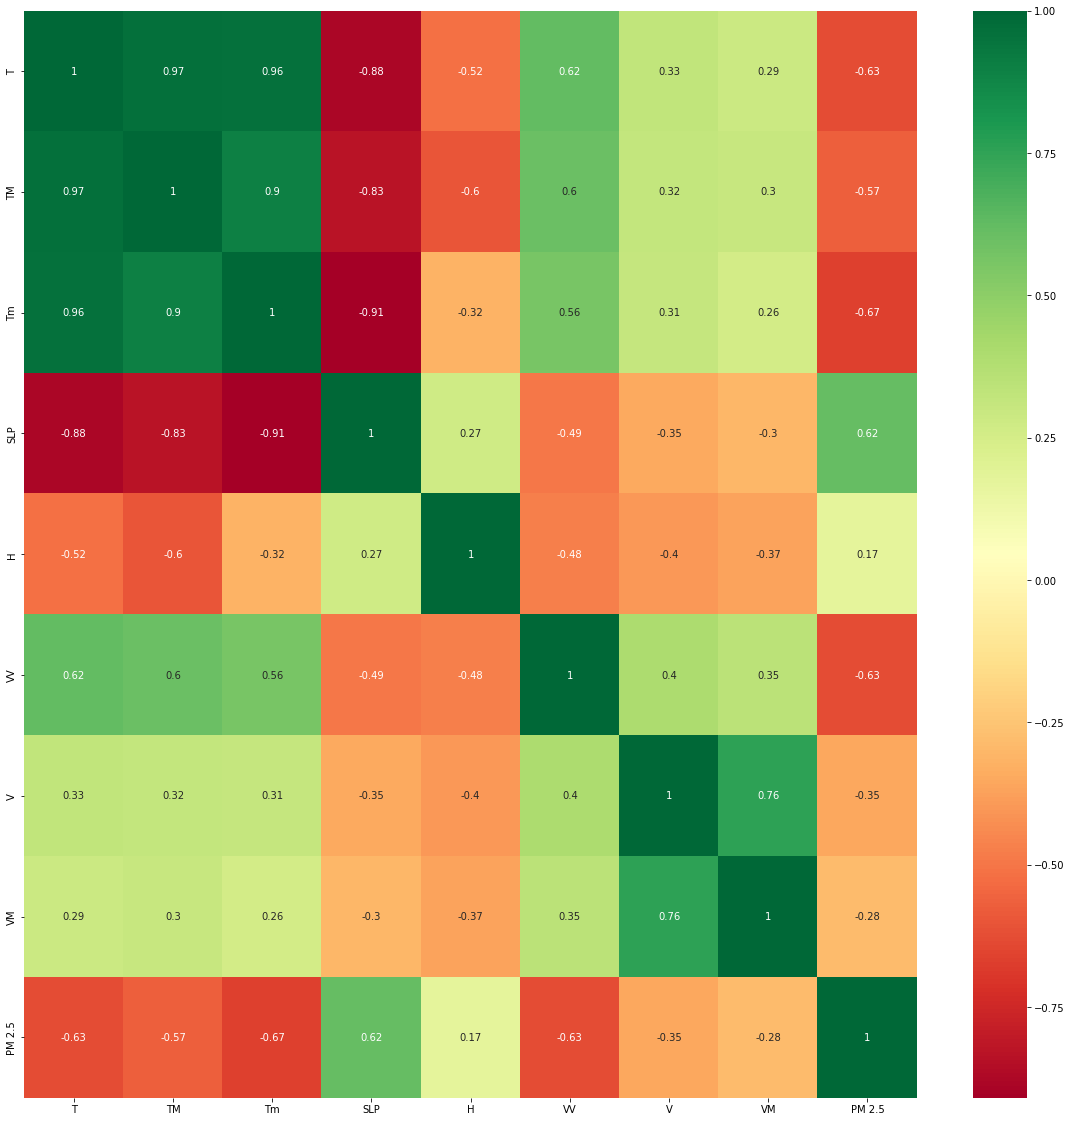

In [10]:
#Get correlations of feautures in the dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

#Plot heat map

g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap = "RdYlGn")



In [11]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
x

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5


In [14]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

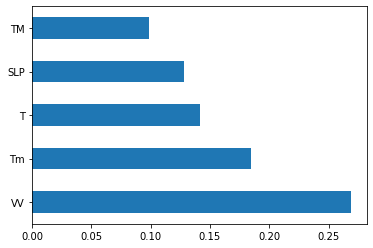

In [15]:
# Visitation graph which indicates the top required features of the given data set 

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [16]:
#Train-test split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

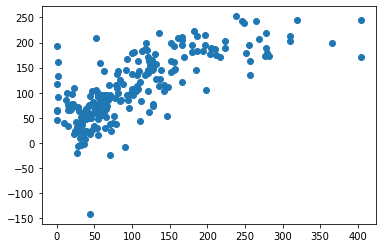

In [18]:
prediction = regressor.predict(X_test)
plt.scatter(Y_test,prediction)

In [19]:
#Linear Regression

from sklearn.model_selection import cross_val_score

mse = cross_val_score(regressor,x,y,scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print("Linear regression error: ",mean_mse)

Linear regression error:  -3499.356187290209


In [37]:
#Ridge regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

print("Ridge regression error: ", ridge_regressor.best_score_)

Ridge regression error:  -3354.617157307126


In [21]:
#Lasso regression

from sklearn.linear_model import Lasso

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)

print("Lasso regression error", lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.008e+05, tolerance: 4.247e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+05, tolerance: 3.871e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Lasso regression error -3356.4102569706833


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

regressor=RandomForestRegressor()
regressor.fit(X_train,Y_train)

score=cross_val_score(regressor,x,y,cv=5)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,Y_train)




Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
rf_random.best_score_



-2581.3948045374314

In [40]:
import xgboost as xgb

In [41]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,Y_train)

[12:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [42]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

xg_random.fit(X_train,Y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[12:17:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.9s
[12:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.7s
[12:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.5s
[12:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, sub

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
xg_random.best_score_

-2641.43563870087